<a href="https://colab.research.google.com/github/amentetteh/AwesomeBooks/blob/main/resultat_bepc_2024_Danyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importation des librairies
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers


In [ ]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Toutees bases
#https://keras.io/api/datasets/

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.min(X_train)
np.max(X_train)

255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

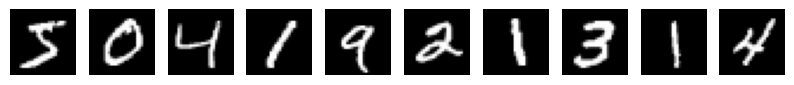

In [ ]:
import matplotlib.pyplot as plt
# Afficher 10 images du dataset
# Crée une nouvelle figure de taille 10x1 pouces
plt.figure(figsize=(10, 1))

# Boucle sur les 10 premières images de X_train
for i in range(10):
    # Ajoute un sous-plot dans une grille de 1 ligne par 10 colonnes
    plt.subplot(1, 10, i+1)
    # Affiche l'image i de X_train en niveaux de gris
    plt.imshow(X_train[i], cmap='gray')
    # Désactive les axes pour une visualisation plus propre
    plt.axis('off')

# Affiche la figure contenant les 10 images
plt.show()

In [ ]:
# Normalisation des données
# Les valeurs de pixels dans les images MNIST vont de 0 à 255.
# - 0 représente le noir complet
# - 255 représente le blanc complet
# Nous divisons ces valeurs par 255 pour les ramener dans la plage [0, 1].
# Cela améliore la stabilité numérique et accélère la convergence du modèle d'apprentissage.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
# Les étiquettes sont converties en vecteurs binaires.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Construction du modèle de réseau de neurones
model = models.Sequential()

# Aplatissement des images 28x28 en un vecteur de 784 éléments
# Le modèle de réseau de neurones denses nécessite un vecteur d'entrée 1D,
# donc nous devons aplatir les images 2D en un vecteur 1D.
model.add(layers.Flatten(input_shape=(28, 28)))  # Aplatissement des images 28x28 en un vecteur de 784 éléments
model.add(layers.Dense(128, activation='relu'))  # Première couche dense avec 128 neurones et activation ReLU
model.add(layers.Dense(64, activation='relu'))  # Deuxième couche dense avec 64 neurones et activation ReLU
model.add(layers.Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones (un pour chaque chiffre) et activation softmax



In [ ]:
model.summary()
#

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilation du modèle
# Nous utilisons 'adam' comme optimiseur car il est efficace et largement utilisé.
# 'categorical_crossentropy' est utilisé comme fonction de perte car nous avons des étiquettes catégorielles.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Entraînement du modèle
# Nous entraînons le modèle sur les données d'entraînement (X_train, y_train) et validons sur les données de test (X_test, y_test).
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2701 - accuracy: 0.9212 - val_loss: 0.1421 - val_accuracy: 0.9568
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1146 - accuracy: 0.9645 - val_loss: 0.1185 - val_accuracy: 0.9651
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.1020 - val_accuracy: 0.9694
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0588 - accuracy: 0.9809 - val_loss: 0.0953 - val_accuracy: 0.9716
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0451 - accuracy: 0.9851 - val_loss: 0.0941 - val_accuracy: 0.9730
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.1119 - val_accuracy

In [ ]:
# Évaluation du modèle
# Nous évaluons les performances du modèle sur les données de test.
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.1161 - accuracy: 0.9796 - 757ms/epoch - 2ms/step

Test accuracy: 0.9796000123023987


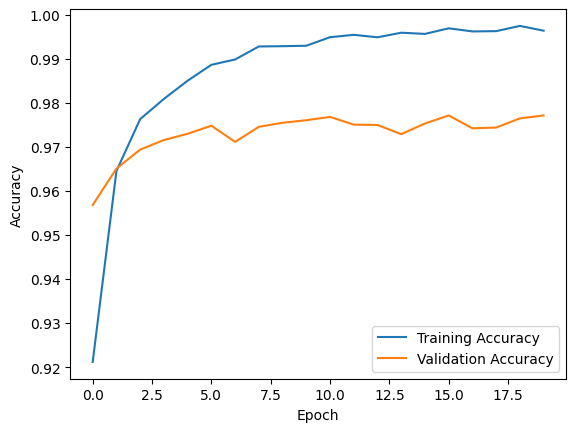

In [ ]:
# Visualisation des performances de l'entraînement
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

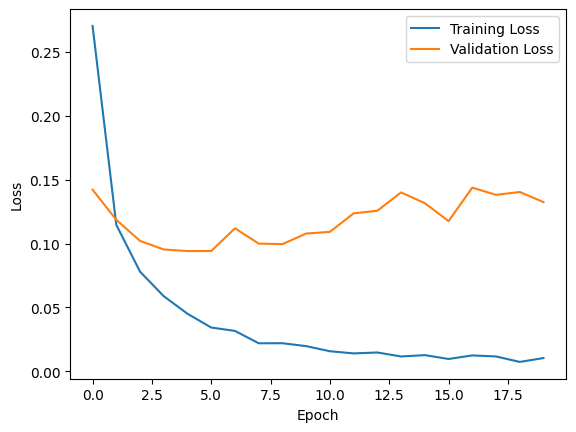

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Prédiction sur une nouvelle base de données (exemple avec les données de test)
predictions = model.predict(X_test[:10])

1/1 [==============================] - 0s 138ms/step


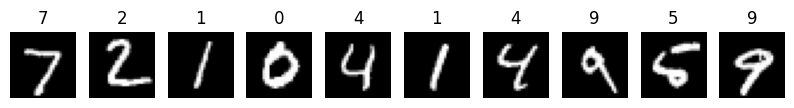

In [ ]:
# Affichage des prédictions pour les 10 premières images du dataset de test
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()

In [1]:
# Matrice de confusion

In [2]:
!pip install requests beautifulsoup4 pandas openpyxl

In [11]:
import requests
import pandas as pd

# Base URL without the parameter
base_url = 'https://resultats.gouv.tg/api/examens/bepc/'

# List to store the extracted data
data = []

# Function to scrape a given page
def scrape_page(url):
    # Send a GET request to fetch the page content
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON content
        json_data = response.json()

        # Assuming json_data is a list of dictionaries
        for item in json_data:
            item['URL'] = url  # Add the URL to the item for reference
            data.append(item)
    else:
        print(f"Failed to retrieve {url}, status code: {response.status_code}")

# Loop through each parameter to scrape the corresponding pages
for param in range(501721,502170):
    full_url = base_url + str(param)
    print(f"Scraping {full_url}")
    scrape_page(full_url)

# Create a pandas DataFrame with the collected data
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('resultat_bepc_2024_apeyeme.xlsx', index=False)

print("Data has been saved to 'resultat_bepc_2024_apeyeme.xlsx'")

from google.colab import files
files.download('resultat_bepc_2024_apeyeme.xlsx')


Scraping https://resultats.gouv.tg/api/examens/bepc/501721
Scraping https://resultats.gouv.tg/api/examens/bepc/501722
Scraping https://resultats.gouv.tg/api/examens/bepc/501723
Scraping https://resultats.gouv.tg/api/examens/bepc/501724
Scraping https://resultats.gouv.tg/api/examens/bepc/501725
Scraping https://resultats.gouv.tg/api/examens/bepc/501726
Scraping https://resultats.gouv.tg/api/examens/bepc/501727
Scraping https://resultats.gouv.tg/api/examens/bepc/501728
Scraping https://resultats.gouv.tg/api/examens/bepc/501729
Scraping https://resultats.gouv.tg/api/examens/bepc/501730
Scraping https://resultats.gouv.tg/api/examens/bepc/501731
Scraping https://resultats.gouv.tg/api/examens/bepc/501732
Scraping https://resultats.gouv.tg/api/examens/bepc/501733
Scraping https://resultats.gouv.tg/api/examens/bepc/501734
Scraping https://resultats.gouv.tg/api/examens/bepc/501735
Scraping https://resultats.gouv.tg/api/examens/bepc/501736
Scraping https://resultats.gouv.tg/api/examens/bepc/5017

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
df


,id_fiche_examen,annee,centre_decrit,date_naissance,decision,ets_provenance,examen,jury,lieu_naiss,mention,moyenne,nom_prenom,num_table,region,serie_filiere,session,sexe,telephone,type_enseignement,URL
0,353591,2024,CEG DANYI APEYEME,07/04/2008,Ajourne,CEG DANYI KPETO,BEPC,508,Danyi Gbaladzé,Ajourne,None,ABISSI Rock,501721,Plateaux Ouest,B,Normale,M,97889326,GENERAL,https://resultats.gouv.tg/api/examens/bepc/501721
1,351228,2024,CEG DANYI APEYEME,11/07/2009,Ajourne,LYCEE DANYI KUDZRAGAN,BEPC,508,DISP YIKPA,Ajourne,None,ABIYI Essodjelinam Sabilon,501722,Plateaux Ouest,B,Normale,M,90467325,GENERAL,https://resultats.gouv.tg/api/examens/bepc/501722
2,352206,2024,CEG DANYI APEYEME,31/12/2005,Ajourne,LYCEE DANYI KUDZRAGAN,BEPC,508,Danyi Kponué,Ajourne,None,ABIYI Bruno,501723,Plateaux Ouest,B,Normale,M,98214924,GENERAL,https://resultats.gouv.tg/api/examens/bepc/501723
3,351730,2024,CEG DANYI APEYEME,31/12/2005,Ajourne,CEG DANYI KPETO,BEPC,508,Danyi Dafo,Ajourne,None,ADAGLO Adjo,501724,Plateaux Ouest,B,Normale,F,96015600,GENERAL,https://resultats.gouv.tg/api/examens/bepc/501724
4,355527,2024,CEG DANYI APEYEME,07/10/2007,Ajourne,CEG DANYI ATIGBA-N'DIGBE,BEPC,508,LOME,Ajourne,None,ADANYEBOU Kossi Serge,501725,Plateaux Ouest,B,Normale,M,79747789,GENERAL,https://resultats.gouv.tg/api/examens/bepc/501725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,351251,2024,CEG DANYI APEYEME,21/02/2005,Ajourne,COLLEGE SAINT MICHEL,BEPC,509,KPALIME,Ajourne,None,WOMPA Komi Elikplim Alexandre,502165,Plateaux Ouest,B,Normale,M,97835168,GENERAL,https://resultats.gouv.tg/api/examens/bepc/502165
395,354614,2024,CEG DANYI APEYEME,01/04/2009,Ajourne,LYCEE DANYI KUDZRAGAN,BEPC,509,KOUDZRAGA,Ajourne,None,YAWLUI Kokou Hugues,502166,Plateaux Ouest,B,Normale,M,70563812,GENERAL,https://resultats.gouv.tg/api/examens/bepc/502166
396,355085,2024,CEG DANYI APEYEME,31/12/2008,Ajourne,CEG DANYI ATIGBA-N'DIGBE,BEPC,509,Danyi Koudzagan,Ajourne,None,YAWULUI Kodjo Luc,502167,Plateaux Ouest,B,Normale,M,98080418,GENERAL,https://resultats.gouv.tg/api/examens/bepc/502167
397,354100,2024,CEG DANYI APEYEME,31/12/2005,Ajourne,CEG DANYI DZOGBEGAN-MEMPEASSEM,BEPC,509,AHLON ONANALE,Ajourne,None,YOMA Yawavi,502168,Plateaux Ouest,B,Normale,F,97204755,GENERAL,https://resultats.gouv.tg/api/examens/bepc/502168


In [15]:
print(df.head())

  id_fiche_examen annee      centre_decrit date_naissance decision  \
0          353591  2024  CEG DANYI APEYEME     07/04/2008  Ajourne   
1          351228  2024  CEG DANYI APEYEME     11/07/2009  Ajourne   
2          352206  2024  CEG DANYI APEYEME     31/12/2005  Ajourne   
3          351730  2024  CEG DANYI APEYEME     31/12/2005  Ajourne   
4          355527  2024  CEG DANYI APEYEME     07/10/2007  Ajourne   

             ets_provenance examen jury      lieu_naiss  mention moyenne  \
0           CEG DANYI KPETO   BEPC  508  Danyi Gbaladzé  Ajourne    None   
1     LYCEE DANYI KUDZRAGAN   BEPC  508      DISP YIKPA  Ajourne    None   
2     LYCEE DANYI KUDZRAGAN   BEPC  508    Danyi Kponué  Ajourne    None   
3           CEG DANYI KPETO   BEPC  508      Danyi Dafo  Ajourne    None   
4  CEG DANYI ATIGBA-N'DIGBE   BEPC  508            LOME  Ajourne    None   

                   nom_prenom num_table          region serie_filiere  \
0                 ABISSI Rock    501721  Plateaux

In [16]:
# Résumé statistique des données numériques
print(df.describe())

       id_fiche_examen annee      centre_decrit date_naissance decision  \
count              399   399                399            399      399   
unique             399     1                  1            291        6   
top             353591  2024  CEG DANYI APEYEME     31/12/2008  Ajourne   
freq                 1   399                399             29      315   

                  ets_provenance examen jury     lieu_naiss  mention moyenne  \
count                        399    399  399            399      399       0   
unique                         8      1    2            153        6       0   
top     CEG DANYI ATIGBA-N'DIGBE   BEPC  508  Danyi-Apéyémé  Ajourne     NaN   
freq                          91    399  200             34      315     NaN   

         nom_prenom num_table          region serie_filiere  session sexe  \
count           399       399             399           399      399  399   
unique          399       399               1             1        1 

In [17]:
# Vérifier les types de données et les informations sur les colonnes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_fiche_examen    399 non-null    object
 1   annee              399 non-null    object
 2   centre_decrit      399 non-null    object
 3   date_naissance     399 non-null    object
 4   decision           399 non-null    object
 5   ets_provenance     399 non-null    object
 6   examen             399 non-null    object
 7   jury               399 non-null    object
 8   lieu_naiss         399 non-null    object
 9   mention            399 non-null    object
 10  moyenne            0 non-null      object
 11  nom_prenom         399 non-null    object
 12  num_table          399 non-null    object
 13  region             399 non-null    object
 14  serie_filiere      399 non-null    object
 15  session            399 non-null    object
 16  sexe               399 non-null    object
 1

In [19]:
count_by_ets = df['ets_provenance'].value_counts()
print(count_by_ets)

ets_provenance
CEG DANYI ATIGBA-N'DIGBE          91
CEG DANYI APEYEME                 81
CEG DANYI KPETO                   67
LYCEE DANYI KUDZRAGAN             53
COLLEGE SAINT MICHEL              40
CEG DANYI DZOGBEGAN-MEMPEASSEM    37
CEG DANYI AMEGAPE-NYAMEGBE        19
CEG DANYI KETEME                  11
Name: count, dtype: int64


In [23]:
# Taux de réussite par établissement de provenance
success_rate_by_ets = df.groupby('ets_provenance')['decision'].apply(lambda x: (x != 'Ajourne').sum() / len(x) * 100)
print(success_rate_by_ets)

ets_provenance
CEG DANYI AMEGAPE-NYAMEGBE        31.578947
CEG DANYI APEYEME                 33.333333
CEG DANYI ATIGBA-N'DIGBE          15.384615
CEG DANYI DZOGBEGAN-MEMPEASSEM    24.324324
CEG DANYI KETEME                  18.181818
CEG DANYI KPETO                    7.462687
COLLEGE SAINT MICHEL              27.500000
LYCEE DANYI KUDZRAGAN             18.867925
Name: decision, dtype: float64


In [25]:
df['decision'].unique()

array(['Ajourne', 'Passable', 'TBien', 'Abien', 'Absent', 'Bien'],
      dtype=object)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculer les taux de réussite et d'échec par ets_provenance
summary = df.groupby('ets_provenance')['decision'].value_counts(normalize=True).unstack().fillna(0)

print(summary)


decision                           Abien    Absent   Ajourne      Bien  \
ets_provenance                                                           
CEG DANYI AMEGAPE-NYAMEGBE      0.000000  0.052632  0.684211  0.000000   
CEG DANYI APEYEME               0.024691  0.049383  0.666667  0.000000   
CEG DANYI ATIGBA-N'DIGBE        0.010989  0.000000  0.846154  0.000000   
CEG DANYI DZOGBEGAN-MEMPEASSEM  0.000000  0.027027  0.756757  0.054054   
CEG DANYI KETEME                0.000000  0.000000  0.818182  0.000000   
CEG DANYI KPETO                 0.000000  0.029851  0.925373  0.000000   
COLLEGE SAINT MICHEL            0.050000  0.000000  0.725000  0.025000   
LYCEE DANYI KUDZRAGAN           0.037736  0.000000  0.811321  0.000000   

decision                        Passable     TBien  
ets_provenance                                      
CEG DANYI AMEGAPE-NYAMEGBE      0.263158  0.000000  
CEG DANYI APEYEME               0.259259  0.000000  
CEG DANYI ATIGBA-N'DIGBE        0.142857  0.000

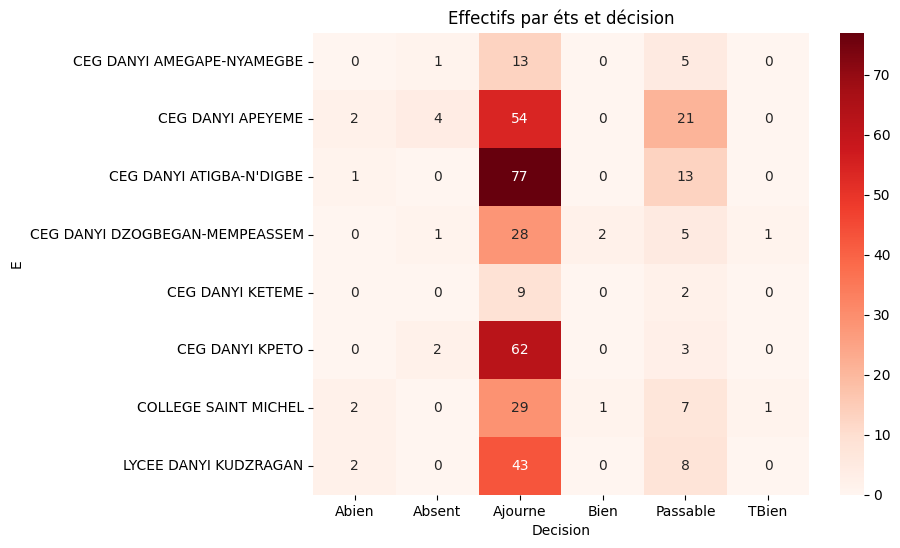

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Créer un tableau croisé dynamique pour obtenir les effectifs
pivot_table = pd.pivot_table(df, index='ets_provenance', columns='decision', aggfunc='size', fill_value=0)


# Créer le heatmap à partir du tableau croisé dynamique
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='d')
plt.title('Effectifs par éts et décision')
plt.xlabel('Decision')
plt.ylabel('E')
plt.yticks(rotation=0)
plt.show()


In [32]:
df["decision"].unique()

array(['Ajourne', 'Passable', 'TBien', 'Abien', 'Absent', 'Bien'],
      dtype=object)